# Math 395 Miniproject 3 (Neural nets)

Hope College, Fall 2024

Import libraries

In [6]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import scipy.io

# add more libraries here

## (1) Display the dicision boundary of a neural network

Train several neural networks on the twomoons data and display their decision boundaries

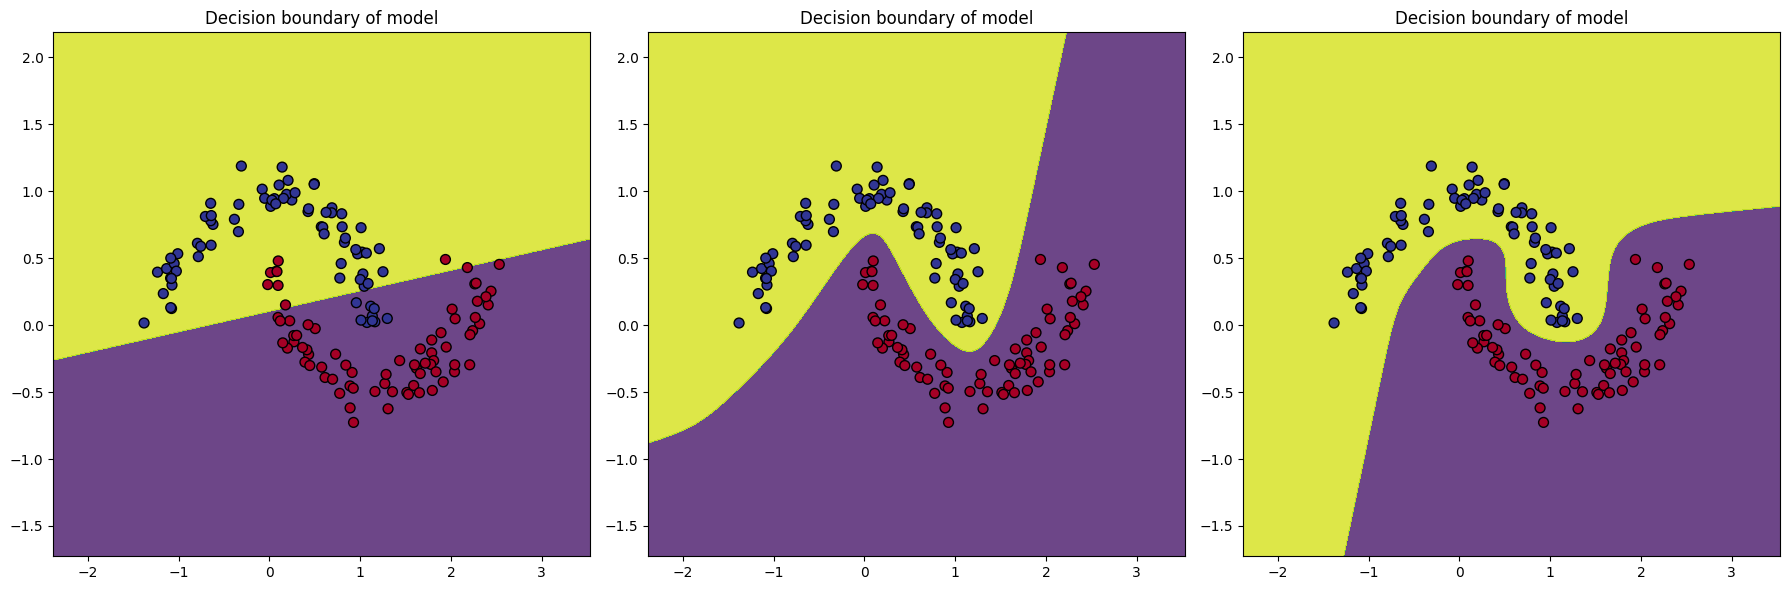

In [7]:
mat = scipy.io.loadmat('twomoons.mat')

X_train = mat['X']
y_train = mat['truelabels'].ravel()
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
def plot_decision_boundary(X, y, model, ax):
    h = .002  # Step size in the mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50, cmap=plt.cm.RdYlBu)
    ax.set_title(f"Decision boundary of model")

# Train several neural networks with different configurations
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

hidden_layer_configs = [(1,), (6,), (5,10)]  # Different layer configurations

for i, config in enumerate(hidden_layer_configs):
    # Create and train the MLPClassifier 
    model = MLPClassifier(hidden_layer_sizes=config,
                          activation = 'logistic',
                          solver = 'adam',
                          alpha = 1e-4,
                          learning_rate_init=0.2,
                           max_iter=10000)
    model.fit(X_train, y_train)
    
    # Plot decision boundary for each model
    plot_decision_boundary(X_train, y_train, model, axes[i])

plt.tight_layout()
plt.show()

## (2) Fully connected neural networks

Train a neural network using the training images in the fashion mnist data set and evaluate the network on the test data. Try to play with the hyperparameters of the network, such as 

- number of layers, 
- number of neurons on each layer, 
- activation function,
- regularization parameter, and
- batch size

What is the lowest test error you can achieve?

In [8]:
mat = scipy.io.loadmat('fashion.mat')

X_train = mat['Xtr']
y_train = mat['ytr']
X_test = mat['Xtst']
y_test = mat['ytst']

## (3) Convolutional neural network on the fashion-mnist data

You can refer to the following webpage:

https://www.datacamp.com/tutorial/convolutional-neural-networks-python

You just need to copy all the code from there and reproduce the results below.